## Blackboard Naming Game

### 1. basic speaker-hearer rules

In [6]:
## basic speaker-hearer rules

import random

## s is individual of P (population-list)
## M is the dictionary of memories {node:memory list of node}
## V is a predefined vocabulary
## word is the word in the shared blackboard
## alpha is a parameter
def speaker_rule(s,M,V,word,alpha):
    ## first the speaker s decides if she uses word in blackboard
    if random.random()<alpha:
        w = word
        if len(M[s])==0:
            M[s]+=[w]
    else:
        ## the speaker s selects one word w from her inventory
        if len(M[s])==0:
            w = random.choice(V)
            M[s]+=[w]
        else:
            w = random.choice(M[s])
    return w

## h is one node of P (population-list)
## word is the word uttered by the speaker
## M is the dictionary of memories {node:memory list of node}
def hearer_rule(h,word,M):
    ## the hearer receives word 
    success = False
    if word in M[h]:
        success = True
    return success

### 2. basic dynamics

In [7]:
## s is one node of P (population-list)
## h is one node of P (population-list)
## word is speaker's word
## M is the dictionary of memories {node:memory list of node}
## V is a predefined vocabulary

def dynamics(s,h,word,M,V,success):
    ## alignment strategies
    if success == True:
        M[s]=[word]
        M[h]=[word]
    else:
        M[h]+=[word]
    return M  

In [8]:
## some measures

def measure_number_words(M):
    join_M = [item for item in M.values()]
    join_M = [item for sublist in join_M for item in sublist]
    return len(join_M),len(set(join_M))

In [43]:
import networkx as nx
import math 
import numpy as np


ALPHA=[]
for k in range(101):
    ALPHA+=[k/float(100)]
    
T = 100000
number_nodes = 1024
## the simplest version!
P = list(range(number_nodes))
number_words = number_nodes
V = range(number_words)

number_list = []
for alpha in ALPHA:
    
    blackboard = random.choice(V)
    M = {node:[] for node in P}
    number = []
    
    for t in range(T):
    
        a,b = measure_number_words(M)
        number+=[[a,b]]
        if a == number_words and b == 1:
            break
    
        ## speaker
        others = list(P)
        speaker = random.choice(others)
        others.pop(speaker)
        hearer = random.choice(others)
        ## word
        word = speaker_rule(speaker,M,V,blackboard,alpha)
        ## success
        success = hearer_rule(hearer,word,M)
        ## speaker-hearer interaction!
        M = dynamics(speaker,hearer,word,M,V,success)
        if success == True:
            blackboard = word
                
    number_list+=[number]

In [44]:
numberW = []
for item in number_list:
    numberW+=[list(zip(*item))[0]]
    
numberW = [float(sum(col))/len(col)/number_nodes for col in zip(*numberW)]

In [45]:
numberD = []
for item in number_list:
    numberD+=[list(zip(*item))[1]]
    
numberD = [float(sum(col))/len(col) for col in zip(*numberD)]

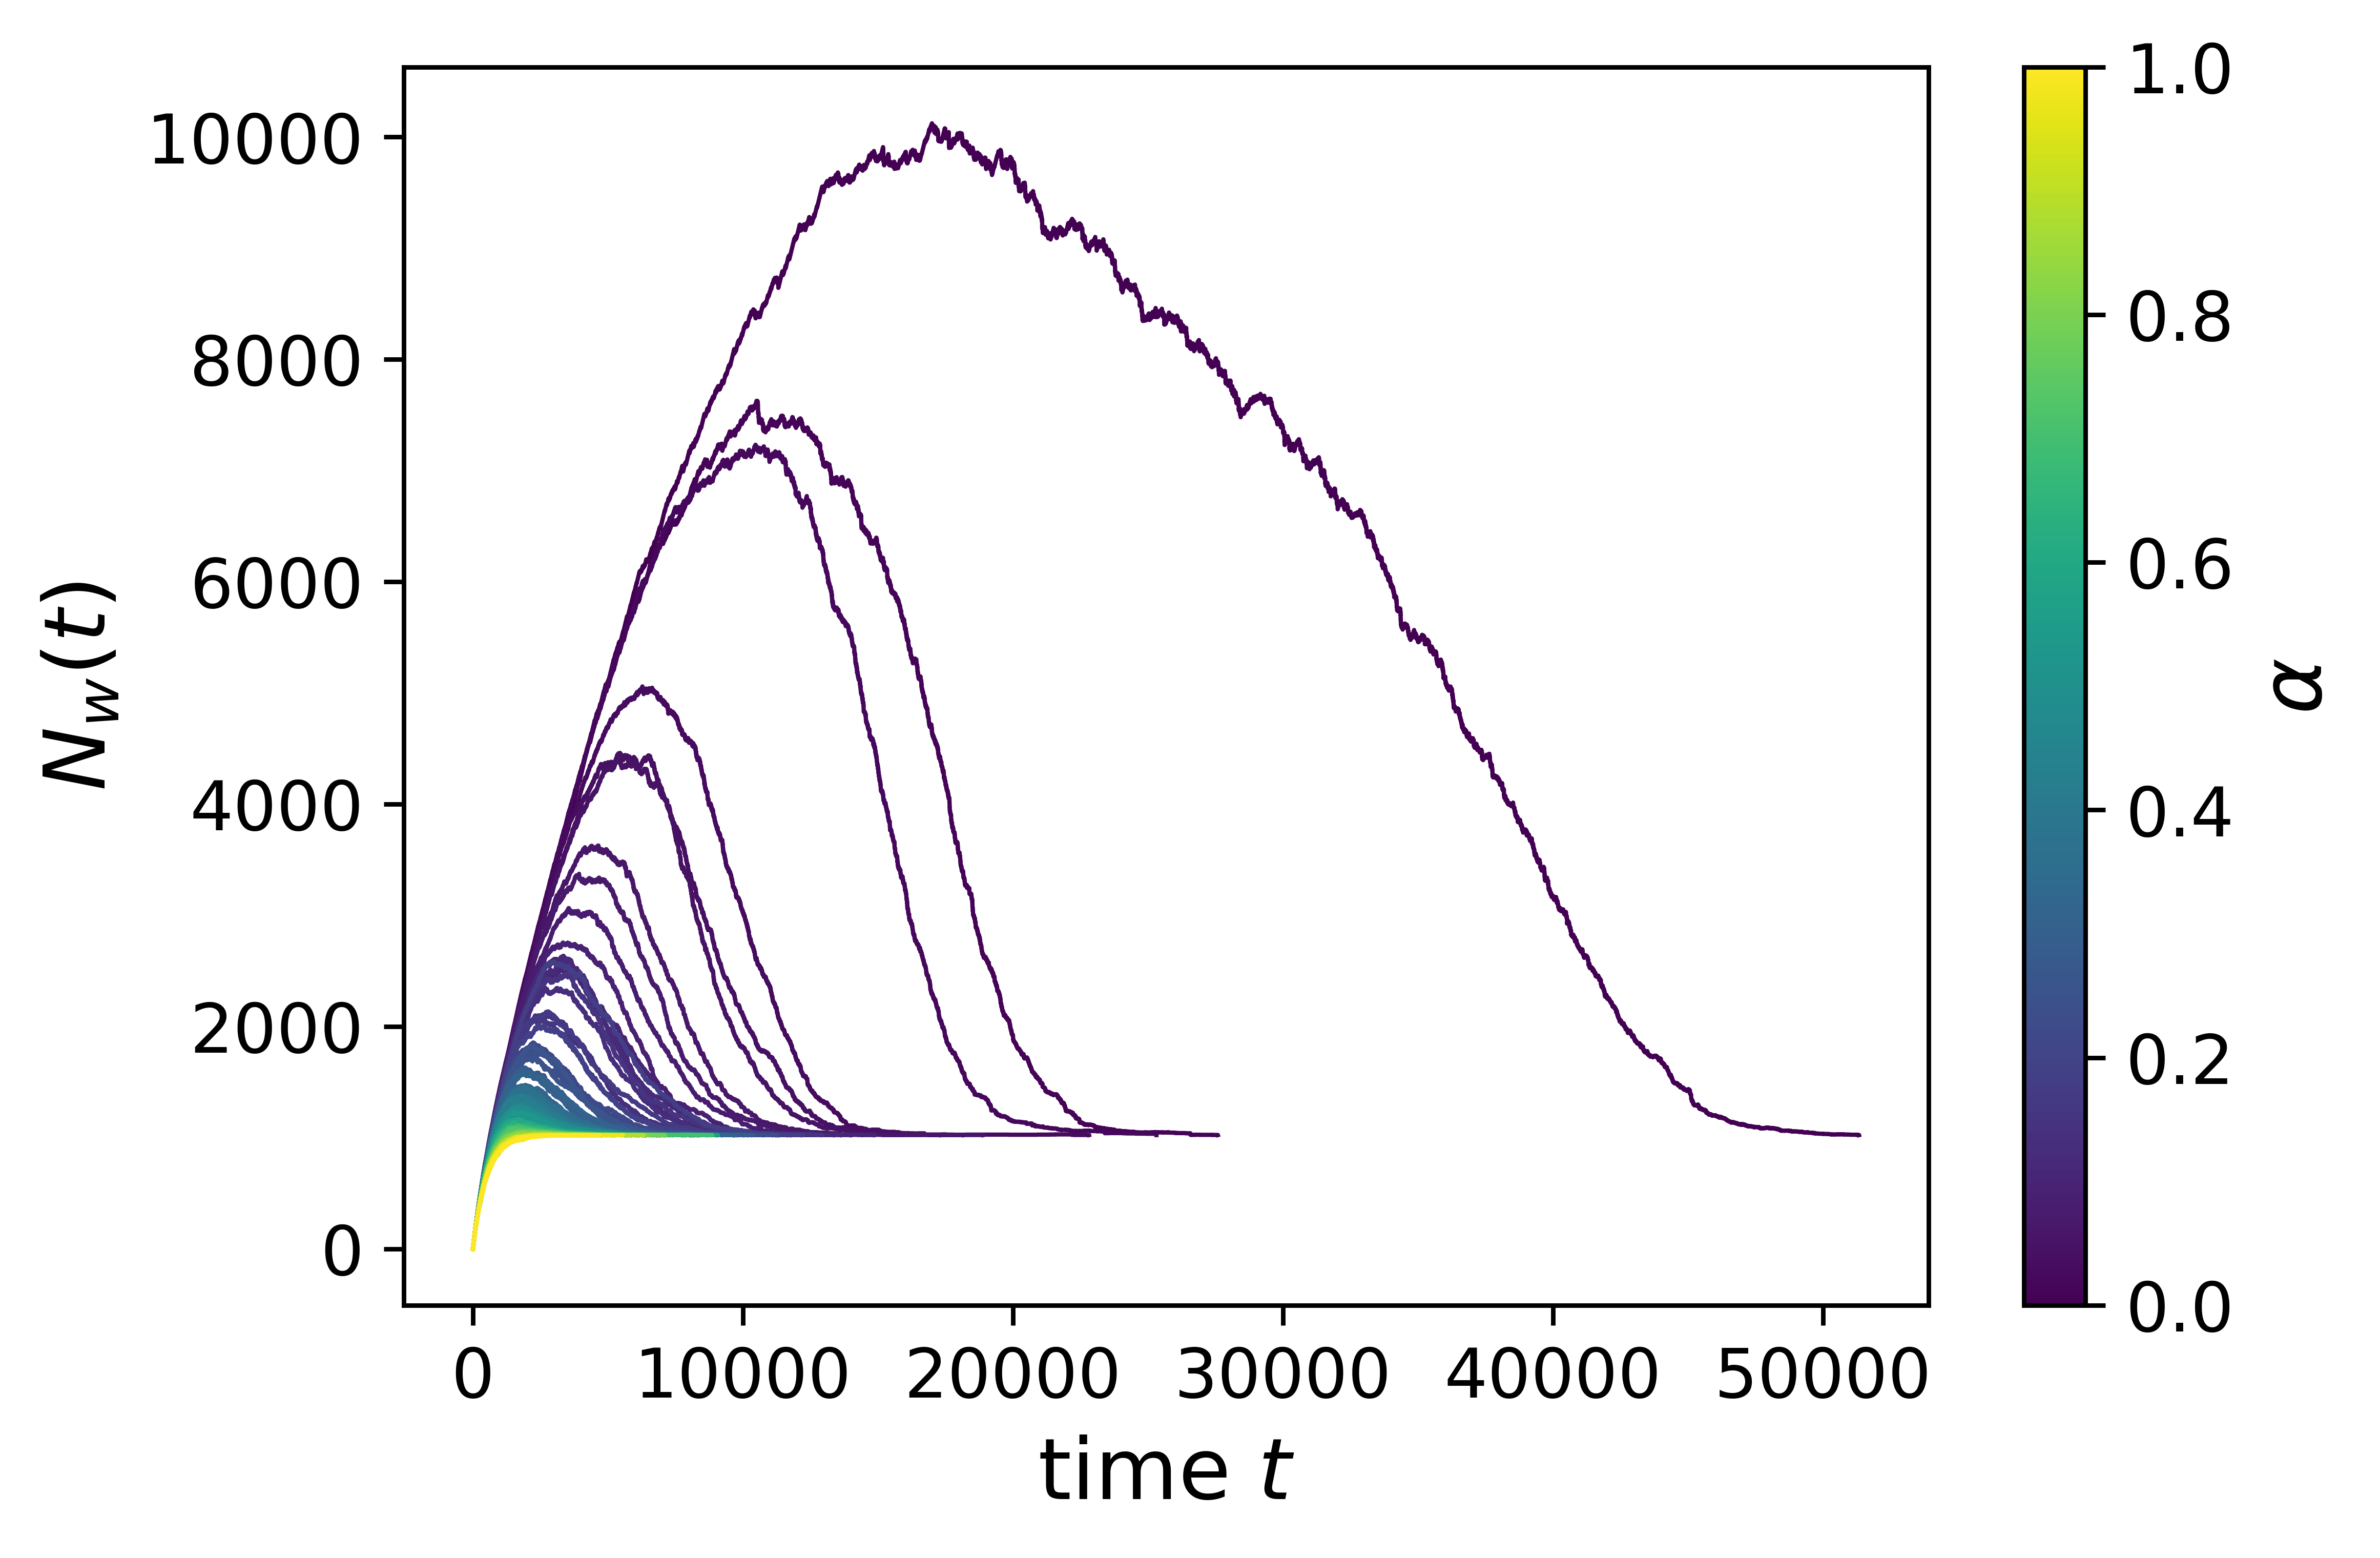

In [46]:
import matplotlib.pyplot as plt
import matplotlib.colors
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

fig, ax = plt.subplots(dpi=800)

for item in number_list:
    p = ALPHA[number_list.index(item)]
    item = list(zip(*item))[0]
    plt.plot(range(len(item)), item,color=cmap(norm(p)),linewidth=0.75,marker='o',markersize=0,fillstyle='none',markeredgewidth=1.5,clip_on=False)#,label=r'$N_w(t)$')
#plt.plot(range(len(numberD)), numberD,color='m',linewidth=0.75,marker='+',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_d(t)$')
sma = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sma.set_array([]) 

cbar = fig.colorbar(sma)
cbar.ax.set_ylabel(r'$\alpha$',fontsize=15)

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
#plt.legend(loc='best')
plt.ylabel(r'$N_w(t)$',fontsize=15)
plt.xlabel(r'time $t$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('words.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

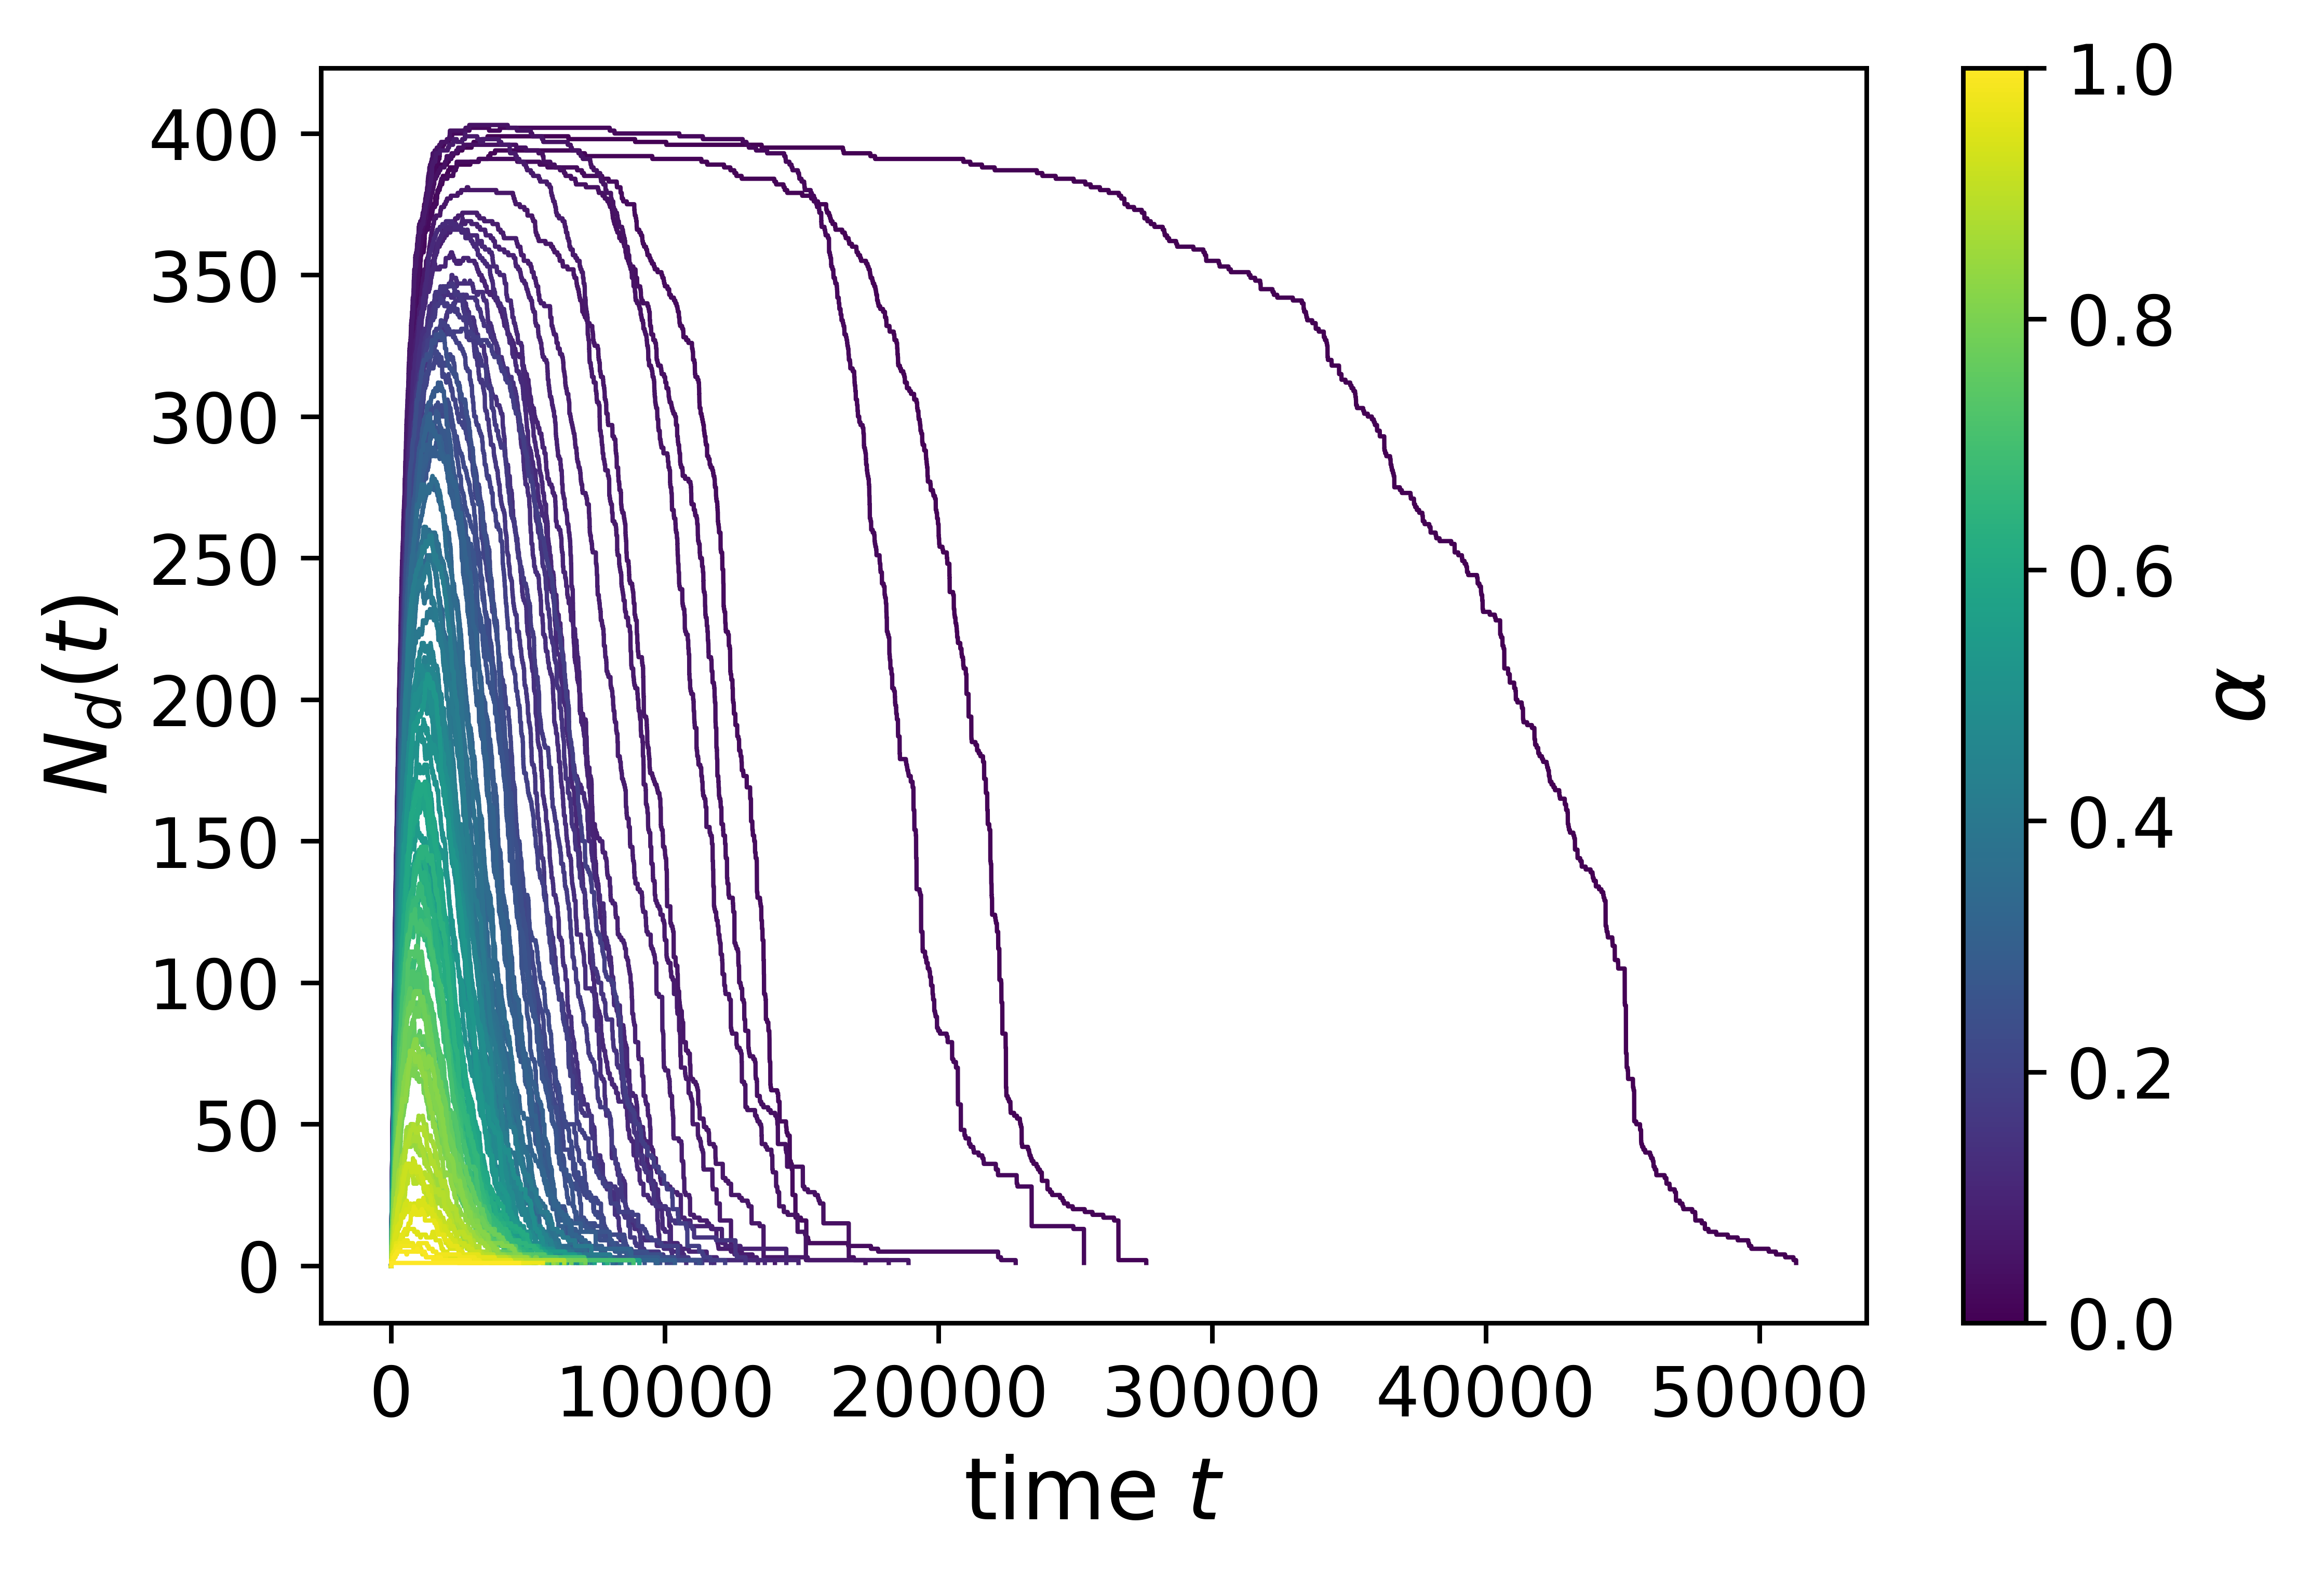

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

fig, ax = plt.subplots(dpi=800)

for item in number_list:
    p = ALPHA[number_list.index(item)]
    item = list(zip(*item))[1]
    plt.plot(range(len(item)), item,color=cmap(norm(p)),linewidth=0.75,marker='o',markersize=0,fillstyle='none',markeredgewidth=1.5,clip_on=False)#,label=r'$N_w(t)$')
#plt.plot(range(len(numberD)), numberD,color='m',linewidth=0.75,marker='+',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_d(t)$')
sma = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sma.set_array([]) 

cbar = fig.colorbar(sma)
cbar.ax.set_ylabel(r'$\alpha$',fontsize=15)

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
#plt.legend(loc='best')
plt.ylabel(r'$N_d(t)$',fontsize=15)
plt.xlabel(r'time $t$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('different_words.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()